## Bloco 1- Organizando e Reformulando o Dataset

In [ ]:
import pandas as pd

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Dividindo o Dataset para visualizar relações iniciais

In [ ]:
# O código a seguir cria um dataframe contendo as faixas de público e as respectivas médias de gols associadas a elas
pub_max = dfbr["publico"].max()
pub_max_norm = pub_max/25
publico_gols = ["publico", "gols_man", "gols_vis"]
dfbr_publico_gols = dfbr[publico_gols]
lista_medias_publico = []
lista_medias_gols_publico = []

for i in range(25):
    n_menor = i*pub_max_norm
    n_maior = (i+1)*pub_max_norm
    dfbr_publico_gols_sep = dfbr_publico_gols.loc[(dfbr_publico_gols["publico"] >= n_menor) & (dfbr_publico_gols["publico"] < n_maior)]
    media_gols_publico_sep = dfbr_publico_gols_sep["gols_man"].mean()
    media_publico = (n_menor + n_maior)/2
    lista_medias_publico.append(media_publico)
    lista_medias_gols_publico.append(media_gols_publico_sep)

dic_publico_gols = {
    "publico_medio": lista_medias_publico,
    "gols_man": lista_medias_gols_publico,
}

dfpg = pd.DataFrame.from_dict(dic_publico_gols)

In [ ]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do mandante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()
valor_max_norm = valor_max/10
valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]
dfbr_valor_gols = dfbr[valor_gols]
lista_medias_valor = []
lista_medias_gols_valor = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_man"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor.append(media_gols_valor_sep)
    
dic_valor_gols = {
    "valor_medio": lista_medias_valor,
    "gols_man": lista_medias_gols_valor,
}

dfvg = pd.DataFrame.from_dict(dic_valor_gols)

In [ ]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do time visitante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()

valor_max_norm = valor_max/10

valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]

dfbr_valor_gols = dfbr[valor_gols]

lista_medias_valor = []

lista_medias_gols_valor_vis = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_vis"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor_vis.append(media_gols_valor_sep)
    
dic_valor_gols_vis = {
    "valor_medio_man": lista_medias_valor,
    "gols_vis": lista_medias_gols_valor_vis,
}

dfvgv = pd.DataFrame.from_dict(dic_valor_gols_vis)

In [ ]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time mandante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep = dfbr_colocacao_gols_sep["gols_man"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao.append(media_gols_colocacao_sep)
    
dic_colocacao_gols = {
    "colocacao_man": lista_colocacao,
    "gols_man": lista_medias_gols_colocacao,
}

dfcg = pd.DataFrame.from_dict(dic_colocacao_gols)

In [ ]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time visitante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao_vis = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep_vis = dfbr_colocacao_gols_sep["gols_vis"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao_vis.append(media_gols_colocacao_sep_vis)
    
dic_colocacao_gols_vis = {
    "colocacao_man": lista_colocacao,
    "gols_vis": lista_medias_gols_colocacao_vis,
}

dfcgv = pd.DataFrame.from_dict(dic_colocacao_gols_vis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

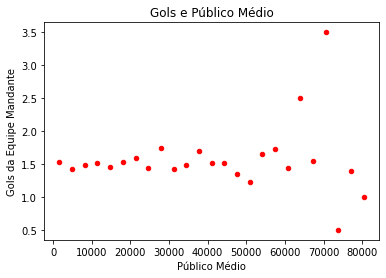

In [ ]:
# Nesta linha, são plotados os gráficos de média de gols em cada faixa de público

fig = plt.figure()
ax1 = fig.add_subplot(111)
dfpg.plot('publico_medio','gols_man',legend=True, ax=ax1, kind = 'scatter', color = 'red')
plt.title('Gols e Público Médio')
plt.xlabel('Público Médio')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Público.png', dpi=100, format='png', facecolor='white')
plt.show()

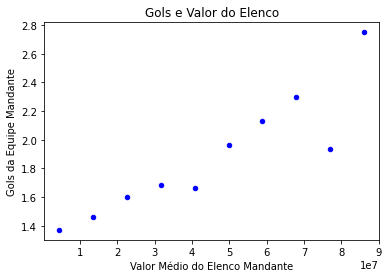

In [ ]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada faixa de valor do mandante

fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
dfvg.plot('valor_medio','gols_man',legend=True, ax=ax2, kind = 'scatter', color = 'blue')
plt.title('Gols e Valor do Elenco')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Valor do Elenco.png', dpi=100, format='png', facecolor='white')
plt.show()

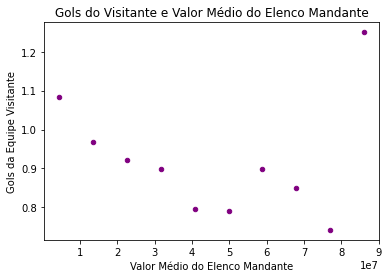

In [ ]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada faixa de valor do mandante

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
dfvgv.plot('valor_medio_man','gols_vis',legend=True, ax=ax3, kind = 'scatter', color = 'purple')
plt.title('Gols do Visitante e Valor Médio do Elenco Mandante')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Valor do Elenco Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

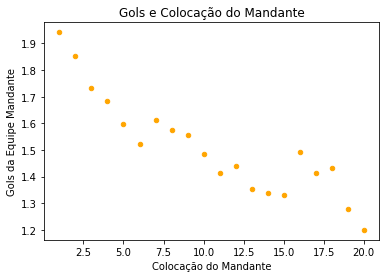

In [ ]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada colocação do mandante

fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
dfcg.plot('colocacao_man','gols_man',legend=True, ax=ax4, kind = 'scatter', color = 'orange')
plt.title('Gols e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

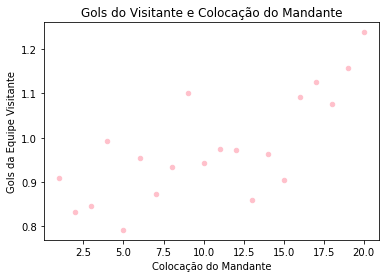

In [ ]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada colocação do mandante

fig4 = plt.figure()
ax5 = fig4.add_subplot(111)
dfcgv.plot('colocacao_man','gols_vis',legend=True, ax=ax5, kind = 'scatter', color = 'pink')
plt.title('Gols do Visitante e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

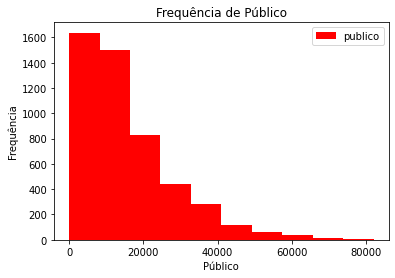

In [ ]:
# Nesta linha, foi plotado um histograma da quantidade de público nos jogos

fig5 = plt.figure()
ax6 = fig5.add_subplot(111)
dfbr['publico'].plot(legend=True, ax=ax6, kind = 'hist', color = 'red')
plt.title('Frequência de Público')
plt.xlabel('Público')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Público.png', dpi=100, format='png', facecolor='white')
plt.show()

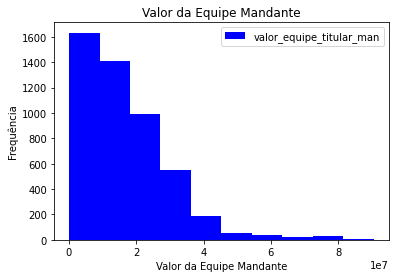

In [ ]:
# Nesta linha, foi plotado um histograma do valor da equipe titular do mandante

fig6 = plt.figure()
ax7 = fig6.add_subplot(111)
dfbr["valor_equipe_titular_man"].plot(legend=True, ax=ax7, kind = 'hist', color = 'blue')
plt.title('Valor da Equipe Mandante')
plt.xlabel('Valor da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Valor da Equipe Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

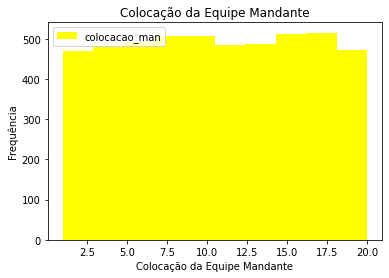

In [ ]:
# Nesta linha, foi plotado um histograma da colocação da equipe mandante.

fig7 = plt.figure()
ax8 = fig7.add_subplot(111)
dfbr["colocacao_man"].plot(legend=True, ax=ax8, kind = 'hist', color = 'yellow')
plt.title('Colocação da Equipe Mandante')
plt.xlabel('Colocação da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência da Colocação.png', dpi=100, format='png', facecolor='white')
plt.show()

## Bloco 2- Métodos de Modelagem dos Dados

### Divisão do dataset

In [ ]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","gols_vis","colocacao_vis","ano_campeonato"]
TARGET = ["gols_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

### Modelo Baseline

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Cria um modelo baseline para termos uma base de comparação com outros modelos
modelo_baseline = DummyRegressor()

# Treina o modelo de acordo com os dados escolhidos antes
modelo_baseline.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_baseline = modelo_baseline.predict(X_teste)
print(f"O time mandante faria {previsao_baseline[0]} gols")

# Verificando o erro do modelo usando o RMSE (root mean squared error)
y_verdadeiro = y_teste
y_previsao_baseline = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_baseline, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} gols.")

O time mandante faria 1.5049683830171634 gols
O RMSE do modelo baseline foi de 1.1665724061927247 gols.


### Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

# Cria um modelo linear
modelo_linear = LinearRegression()

# Treina esse modelo 
modelo_linear.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_linear = modelo_linear.predict(X_teste)
print(previsao_linear[0]) # Foi escolhida apenas uma linha para melhorar a visualização

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao_linear = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_linear, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")

[1.54035654]
O RMSE do modelo linear foi de 1.1010162933686618 gols.


### Regressão Linear Normalizada

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Usa um função normalizadora sobre os dados

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

# Cria um modelo linear
modelo_linear_norm = LinearRegression()

# Treina esse modelo
modelo_linear_norm.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# Realiza uma previsão usando o modelo linear normalizado treinado
previsao = modelo_linear_norm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao = modelo_linear_norm.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")


[[1.82152712]
 [1.71269558]
 [1.80884794]
 ...
 [1.15358695]
 [1.54537951]
 [1.55884239]]
O RMSE do modelo linear foi de 1.1010162933686638 gols.


### k-NN / k vizinhos

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

[1.2]


In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} gols.")

O RMSE do modelo k-NN foi de 1.1231268832786456 gols.


In [ ]:
NUM_VIZINHOS = [1, 10, 100]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} gols.")

O RMSE do modelo k-NN usando k=1 foi de 1.5821006909640374 gols.
O RMSE do modelo k-NN usando k=10 foi de 1.1816806541350324 gols.
O RMSE do modelo k-NN usando k=100 foi de 1.1231268832786456 gols.


### Árvore de Decisão

In [ ]:
# Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[1]) # Escolhido apenas um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} gols.")

1.0
O RMSE do modelo árvore de decisão foi de 1.6809395614746618 gols.


In [ ]:
# Árvore de decisões com hiperparâmetros

from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 1, 2, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 1.681 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 1.130 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 1.333 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 1.166 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e m

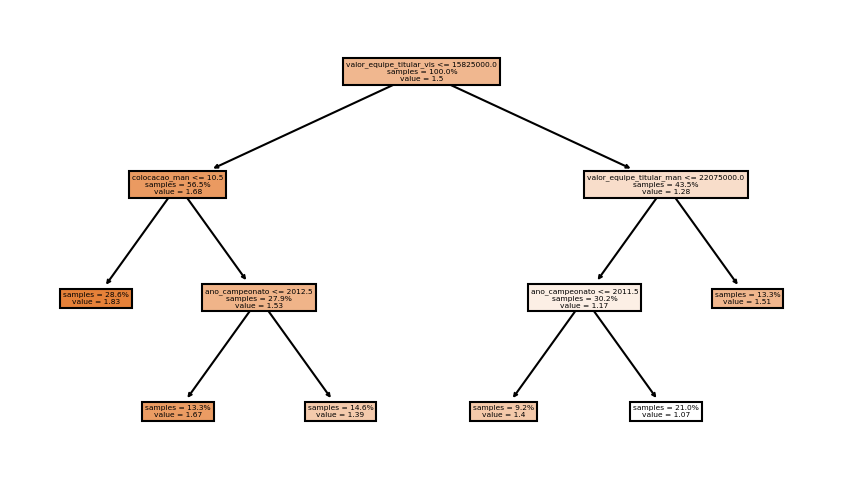

In [ ]:
# Visualização da Árvore de Decisão

from matplotlib import pyplot as plt
from sklearn import tree

# Cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# Cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# Plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# Salva a imagem
#plt.savefig('ÁrvoreDoFut.png',facecolor='white')

# Mostra o plot para o usuário
plt.show()

### Floresta Aleatória

In [ ]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print()
print(previsao[0]) # Escolhido um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo floresta de decisão foi de {RMSE} gols.")

(4428, 1) (493, 1)
(4428,) (493,)

1.83
O RMSE do modelo floresta de decisão foi de 1.1285866872998755 gols.


In [ ]:
# Floresta Aleatória com Hiperparâmetros

from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 1.17 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 1.13 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 1.12 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 1.11 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 1.11 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 1.11 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 1.12 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 1.12 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 1.12 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 1.11 gols.
O RMSE do modelo RF usando n_estimator

### Importância das Features

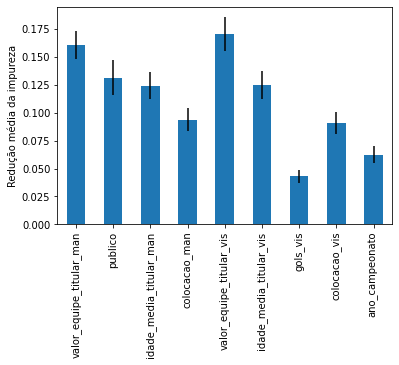

In [ ]:
# Importância das Features com a Impureza

N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

In [ ]:
# Importância das Features com a Permutação e grupo de treino

from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino
y_local = y_treino

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9438965651171258

valor_equipe_titular_vis 0.231 +/- 0.004
valor_equipe_titular_man 0.180 +/- 0.002
colocacao_man            0.139 +/- 0.003
ano_campeonato           0.102 +/- 0.002
publico                  0.095 +/- 0.002
colocacao_vis            0.088 +/- 0.002
idade_media_titular_man  0.088 +/- 0.001
idade_media_titular_vis  0.086 +/- 0.001
gols_vis                 0.050 +/- 0.001


In [ ]:
# Importância das Features com a Permutação e grupo de teste

X_local = X_teste
y_local = y_teste

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos para as features mais importantes
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.6620541401273883

valor_equipe_titular_vis 0.022 +/- 0.007
publico                  0.007 +/- 0.003
gols_vis                 0.005 +/- 0.002


## Usando Classificação

### Reorganizando os dados

In [ ]:
# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

In [ ]:
# Nova divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.3 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis"]
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

### k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

### Floresta Aleatória

In [ ]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino.ravel())

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

In [ ]:
# Floresta Aleatória com hiperparâmetros

from itertools import product

NUM_ARVORES = [50]
NUM_FOLHAS = [3, 6, 9]
NUM_PROFUNDIDADE = [2, 3, 6]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestClassifier(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino.ravel())

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    
    acuracia = metrics.accuracy_score(y_teste, y_previsao)
    #print("Accuracy:",acuracia)
    
    print(
        f"A acurácia do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {acuracia:.4f}."
    )